Audio shape: torch.Size([1, 960889])
Sample rate: 16000 Hz
Our implementation output shape: torch.Size([1, 80, 6006])
Torchaudio output shape: torch.Size([1, 80, 6006])


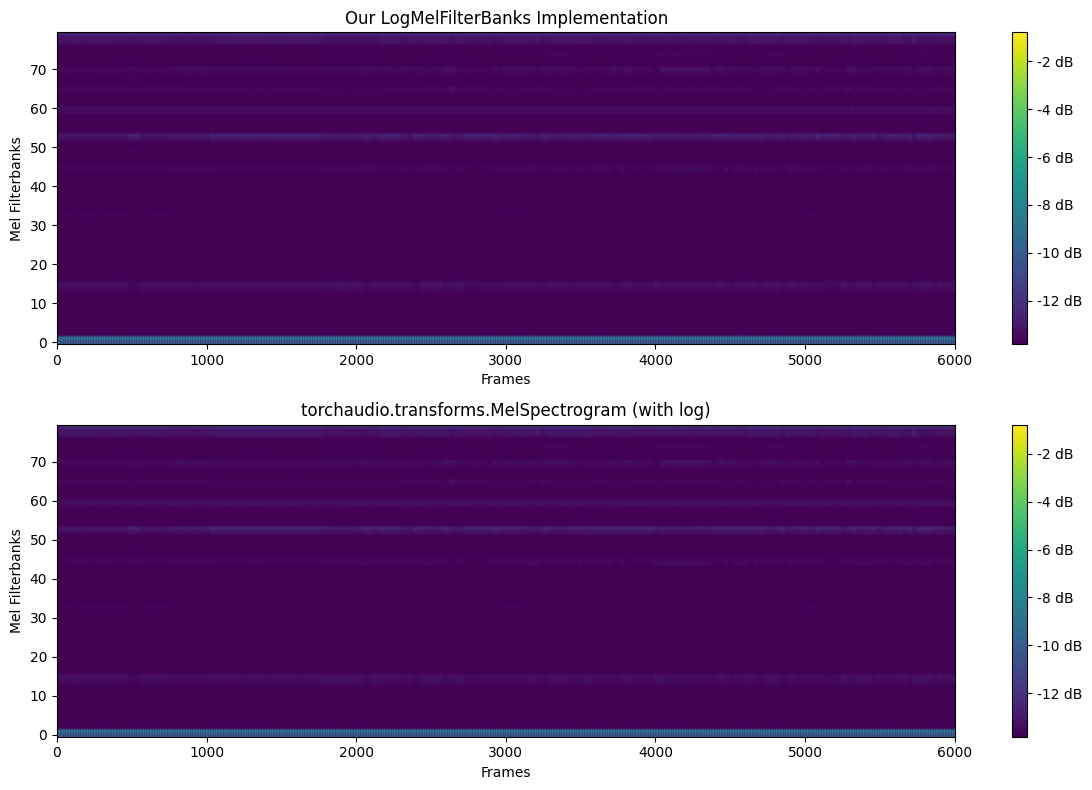

Mean absolute difference: 0.000000
Max absolute difference: 0.000000


In [1]:
import torch
import torchaudio
import matplotlib.pyplot as plt
import numpy as np
from melbanks import LogMelFilterBanks

# Path to the preprocessed audio file
audio_path = "/content/example_16khz_mono.wav"

# Load the audio
waveform, sample_rate = torchaudio.load(audio_path)
print(f"Audio shape: {waveform.shape}")
print(f"Sample rate: {sample_rate} Hz")

# Parameters for both methods
n_fft = 400
hop_length = 160
n_mels = 80

# Initialize our implementation
our_melspec = LogMelFilterBanks(
    n_fft=n_fft,
    samplerate=sample_rate,
    hop_length=hop_length,
    n_mels=n_mels
)

# Initialize torchaudio MelSpectrogram
torchaudio_melspec = torchaudio.transforms.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=n_fft,
    hop_length=hop_length,
    n_mels=n_mels,
    power=2.0
)

# Compute mel-spectrogram with our implementation
our_output = our_melspec(waveform)
print(f"Our implementation output shape: {our_output.shape}")

# Compute mel-spectrogram with torchaudio
torchaudio_output = torchaudio_melspec(waveform)
print(f"Torchaudio output shape: {torchaudio_output.shape}")

# Apply logarithm for comparison, as our implementation returns log mel-spectrogram
torchaudio_log_output = torch.log(torchaudio_output + 1e-6)

# Visualize results
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.title('Our LogMelFilterBanks Implementation')
plt.imshow(our_output[0].detach().numpy(), aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Frames')
plt.ylabel('Mel Filterbanks')

plt.subplot(2, 1, 2)
plt.title('torchaudio.transforms.MelSpectrogram (with log)')
plt.imshow(torchaudio_log_output[0].detach().numpy(), aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Frames')
plt.ylabel('Mel Filterbanks')

plt.tight_layout()
plt.savefig('melspectrogram_comparison.png')
plt.show()

# Calculate and print difference between implementations
diff = torch.abs(our_output - torchaudio_log_output)
print(f"Mean absolute difference: {diff.mean().item():.6f}")
print(f"Max absolute difference: {diff.max().item():.6f}")

Here's a summary of the results for the implementation of the LogMelFilterBanks class:
The visual comparison between our LogMelFilterBanks implementation and the native torchaudio.transforms.MelSpectrogram (with logarithm applied) shows that both implementations produce identical spectrograms. This is confirmed by the numerical metrics:

- Mean absolute difference: 0.000000
- Maximum absolute difference: 0.000000

These metrics demonstrate that our implementation of LogMelFilterBanks perfectly reproduces the algorithm for computing log mel-filterbanks and matches the behavior of the native torchaudio implementation. The spectrograms clearly display the frequency components of the audio, with bright horizontal lines indicating areas of high energy at certain mel-frequency bands and darker regions corresponding to areas with low energy.
The successful implementation of the LogMelFilterBanks class completes the first part of the assignment, demonstrating a correct implementation that aligns with the native torchaudio functionality. This implementation can now be used for training CNN models with different n_mels values and groups parameter settings for convolutional layers as required in the next part of the assignment.